In [2]:
import sys
sys.path.append('..')
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sfp_nsdsyn import *
import warnings
import itertools
warnings.filterwarnings("ignore", category=UserWarning)
pd.options.mode.chained_assignment = None
%load_ext autoreload
%autoreload 2

In [3]:
nsd_dir = '/Volumes/server/Projects/sfp_nsd/natural-scenes-dataset/'
fs_dir = '/Volumes/server/Projects/sfp_nsd/natural-scenes-dataset/nsddata/freesurfer'
# inputs
subj = utils.sub_number_to_string(1, dataset='nsdsyn')
hemi = 'lh'
design_mat = os.path.join(nsd_dir, 'nsddata', 'experiments', 'nsdsynthetic', 'nsdsynthetic_expdesign.mat')
betas = os.path.join(nsd_dir, 'nsddata_betas', 'ppdata', subj, 'nativesurface', prep._get_beta_folder_name(3),
                     f'{hemi}.betas_nsdsynthetic.hdf5')
stim_info = os.path.join(nsd_dir, 'nsdsyn_stim_description_corrected.csv')
rois = [os.path.join(fs_dir, subj, 'label', f'{hemi}.prf-{roi}.mgz')
        for roi in ["visualrois", "eccrois"]]
rois_vals = [[1,2],[1,2,3,4,5]]
prfs = [os.path.join(fs_dir, subj, 'label', f'{hemi}.prf{prf_param}.mgz')
        for prf_param in ["eccentricity", "angle", "size"]]

In [4]:
stim_df = prep.load_stim_info_as_df(stim_info, force_download=True)


File successfully downloaded and saved as /Volumes/server/Projects/sfp_nsd/natural-scenes-dataset/nsdsyn_stim_description_corrected.csv


In [5]:
prf_dict = prep.load_prf_properties_as_dict(prfs, mask, angle_to_radians=True)

NameError: name 'mask' is not defined

In [6]:
trial_orders = prep._load_exp_design_mat(design_mat)
sprial_index = prep._find_beta_index_for_spiral_stimuli(design_mat, stim_df['image_idx'])

In [15]:
spiral_index['fixation_task'][0]

208

In [19]:
from scipy.io import loadmat
import h5py
mat_file = loadmat(design_mat)
ww = mat_file['masterordering'].reshape(-1)

with h5py.File(betas, 'r') as f:
    # betas[hemi].shape shows 784 x # of voxels
    tmp_betas = f.get('betas')
    if mask is None:
        mask = np.ones((tmp_betas.shape[-1],), bool)
    tmp_betas = tmp_betas[:, mask]



In [10]:
spiral_index = prep._find_beta_index_for_spiral_stimuli(design_mat, stim_df['image_idx'])
spiral_index

,image_idx,fixation_task,memory_task
0,105,208,673
1,106,356,635
2,107,152,431
3,108,14,479
4,109,674,209
...,...,...,...
107,212,366,645
108,213,704,239
109,214,250,715
110,215,72,537


In [112]:
betas_dict = prep.load_betas_as_dict(betas, design_mat, stim_df['image_idx'], mask, task_keys=['fixation_task','memory_task'], average=True)
betas_dict.keys()

dict_keys(['avg_betas'])

In [126]:
hemi = 'lh'
design_mat = os.path.join(nsd_dir, 'nsddata', 'experiments', 'nsdsynthetic', 'nsdsynthetic_expdesign.mat')
betas = os.path.join(nsd_dir, 'nsddata_betas', 'ppdata', subj, 'nativesurface', prep._get_beta_folder_name(3),
                     f'{hemi}.betas_nsdsynthetic.hdf5')
stim_info = os.path.join(nsd_dir, 'nsdsynthetic_sf_stim_description.csv')
rois = [os.path.join(fs_dir, subj, 'label', f'{hemi}.prf-{roi}.mgz')
        for roi in ["visualrois", "eccrois"]]
rois_vals = [[1,2],[1,2,3,4,5]]
prfs = [os.path.join(fs_dir, subj, 'label', f'{hemi}.prf{prf_param}.mgz')
        for prf_param in ["eccentricity", "angle", "size"]]

In [127]:
lh_df = prep.make_sf_dataframe(stim_info,
                              design_mat,
                              rois, rois_vals,
                              prfs,
                              betas,
                              drop_phase=False, force_download=False,
                              task_keys=['fixation_task','memory_task'],
                              task_average=True,
                              angle_to_radians=True)

File successfully downloaded and saved as /Volumes/server/Projects/sfp_nsd/natural-scenes-dataset/nsdsynthetic_sf_stim_description.csv


In [112]:
hemi = 'rh'
design_mat = os.path.join(nsd_dir, 'nsddata', 'experiments', 'nsdsynthetic', 'nsdsynthetic_expdesign.mat')
betas = os.path.join(nsd_dir, 'nsddata_betas', 'ppdata', subj, 'nativesurface', prep._get_beta_folder_name(3),
                     f'{hemi}.betas_nsdsynthetic.hdf5')
stim_info = os.path.join(nsd_dir, 'nsdsynthetic_sf_stim_description.csv')
rois = [os.path.join(fs_dir, subj, 'label', f'{hemi}.prf-{roi}.mgz')
        for roi in ["visualrois", "eccrois"]]
rois_vals = [[1,2],[1,2,3,4,5]]
prfs = [os.path.join(fs_dir, subj, 'label', f'{hemi}.prf{prf_param}.mgz')
        for prf_param in ["eccentricity", "angle", "size"]]

In [113]:
rh_df = prep.make_sf_dataframe(stim_info,
                              design_mat,
                              rois, rois_vals,
                              prfs,
                              betas,
                              task_keys=['fixation_task','memory_task'],
                              task_average=True,
                              angle_to_radians=True)

In [115]:
sf_df = prep.concat_lh_rh_df(lh_df, rh_df)

In [117]:
sf_df.iloc[sf_df.query('hemi == "lh"').shape[0]-3:sf_df.query('hemi == "lh"').shape[0]+3]

,stim_idx,image_idx,names,w_r,w_a,phase,class_idx,freq_lvl,voxel,task,betas,eccentricity,angle,size,visualrois,vroinames,eccrois,local_sf,local_ori,hemi
1235469,111,215,intermediate 4,14.0,-34.0,4.712389,27,3,3676,fixation,2.303333,6.167487,0.560892,1.082151,1.0,V1,5.0,0.948856,2.522295,lh
1235470,111,215,intermediate 4,14.0,-34.0,4.712389,27,3,3676,memory,3.270000,6.167487,0.560892,1.082151,1.0,V1,5.0,0.948856,2.522295,lh
1235471,111,215,intermediate 4,14.0,-34.0,4.712389,27,3,3676,avg,2.786667,6.167487,0.560892,1.082151,1.0,V1,5.0,0.948856,2.522295,lh
1235472,0,104,pinwheel,0.0,6.0,0.000000,0,0,3677,fixation,2.330000,3.133089,2.971282,0.921039,2.0,V1,3.0,0.304789,1.400486,rh
1235473,0,104,pinwheel,0.0,6.0,0.000000,0,0,3677,memory,1.103333,3.133089,2.971282,0.921039,2.0,V1,3.0,0.304789,1.400486,rh
1235474,0,104,pinwheel,0.0,6.0,0.000000,0,0,3677,avg,1.716667,3.133089,2.971282,0.921039,2.0,V1,3.0,0.304789,1.400486,rh


In [2]:
sf_df = pd.read_csv('/Users/auna/Dropbox/NYU/Projects/SF/5_voxel_example.csv')

In [4]:
sf_df

,stim_idx,image_idx,names,w_r,w_a,phase,class_idx,freq_lvl,voxel,task,betas,eccentricity,angle,size,visualrois,vroinames,eccrois,local_sf,local_ori
0,0,104,pinwheel,0.0,6.0,0.000000,0,0,0,fixation,1.966667,1.370705,292.141510,84.840942,2.0,V1,3.0,0.696670,0.386442
1,0,104,pinwheel,0.0,6.0,0.000000,0,0,0,memory,0.676667,1.370705,292.141510,84.840942,2.0,V1,3.0,0.696670,0.386442
2,0,104,pinwheel,0.0,6.0,0.000000,0,0,0,avg,1.321667,1.370705,292.141510,84.840942,2.0,V1,3.0,0.696670,0.386442
3,0,104,pinwheel,0.0,6.0,0.000000,0,0,1,fixation,1.883333,1.270235,291.033051,170.579865,2.0,V1,3.0,0.751774,0.367096
4,0,104,pinwheel,0.0,6.0,0.000000,0,0,1,memory,0.763333,1.270235,291.033051,170.579865,2.0,V1,3.0,0.751774,0.367096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,111,215,intermediate 4,14.0,-34.0,4.712389,27,3,4,memory,0.876667,1.247216,293.439117,249.670349,2.0,V1,3.0,4.692096,0.799697
2012,111,215,intermediate 4,14.0,-34.0,4.712389,27,3,4,avg,1.195000,1.247216,293.439117,249.670349,2.0,V1,3.0,4.692096,0.799697
2013,111,215,intermediate 4,14.0,-34.0,4.712389,27,3,5,fixation,1.170000,1.251555,290.870575,170.228104,2.0,V1,3.0,4.675828,0.754867
2014,111,215,intermediate 4,14.0,-34.0,4.712389,27,3,5,memory,0.656667,1.251555,290.870575,170.228104,2.0,V1,3.0,4.675828,0.754867


In [13]:
vs_df = vs.drop_voxels_with_negative_mean_amplitudes(sf_df)
vs_df.groupby('voxel').filter(lambda x: (x.eccentricity + x.size <= 180).all())

,stim_idx,image_idx,names,w_r,w_a,phase,class_idx,freq_lvl,voxel,task,betas,eccentricity,angle,size,visualrois,vroinames,eccrois,local_sf,local_ori


In [12]:
vs_df

,stim_idx,image_idx,names,w_r,w_a,phase,class_idx,freq_lvl,voxel,task,betas,eccentricity,angle,size,visualrois,vroinames,eccrois,local_sf,local_ori
0,0,104,pinwheel,0.0,6.0,0.000000,0,0,0,fixation,1.966667,1.370705,292.141510,84.840942,2.0,V1,3.0,0.696670,0.386442
1,0,104,pinwheel,0.0,6.0,0.000000,0,0,0,memory,0.676667,1.370705,292.141510,84.840942,2.0,V1,3.0,0.696670,0.386442
2,0,104,pinwheel,0.0,6.0,0.000000,0,0,0,avg,1.321667,1.370705,292.141510,84.840942,2.0,V1,3.0,0.696670,0.386442
3,0,104,pinwheel,0.0,6.0,0.000000,0,0,1,fixation,1.883333,1.270235,291.033051,170.579865,2.0,V1,3.0,0.751774,0.367096
4,0,104,pinwheel,0.0,6.0,0.000000,0,0,1,memory,0.763333,1.270235,291.033051,170.579865,2.0,V1,3.0,0.751774,0.367096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,111,215,intermediate 4,14.0,-34.0,4.712389,27,3,4,memory,0.876667,1.247216,293.439117,249.670349,2.0,V1,3.0,4.692096,0.799697
2012,111,215,intermediate 4,14.0,-34.0,4.712389,27,3,4,avg,1.195000,1.247216,293.439117,249.670349,2.0,V1,3.0,4.692096,0.799697
2013,111,215,intermediate 4,14.0,-34.0,4.712389,27,3,5,fixation,1.170000,1.251555,290.870575,170.228104,2.0,V1,3.0,4.675828,0.754867
2014,111,215,intermediate 4,14.0,-34.0,4.712389,27,3,5,memory,0.656667,1.251555,290.870575,170.228104,2.0,V1,3.0,4.675828,0.754867


In [242]:
vs_df = vs.select_voxels(sf_df, drop_by=True, inner_border=vs.pix_to_deg(42.878), outer_border=vs.pix_to_deg(714/2), return_voxel_list=False)
print(sf_df.voxel.nunique() - vs_df.voxel.nunique())
vs_df.voxel.nunique()

4784


2308

In [262]:
df =pd.read_csv('/Volumes/server/Projects/sfp_nsd/derivatives/dataframes/nsdsyn/dset-nsdsyn_subj01_roi-V1_vs-None.csv')
size_df = pd.read_csv('/Volumes/server/Projects/sfp_nsd/derivatives/dataframes/nsdsyn/dset-nsdsyn_subj01_roi-V1_vs-pRFsize.csv')
center_df = pd.read_csv('/Volumes/server/Projects/sfp_nsd/derivatives/dataframes/nsdsyn/dset-nsdsyn_subj01_roi-V1_vs-pRFcenter.csv')
print(df.shape)
print(size_df.shape)
print(center_df.shape)


(2382912, 20)
(787584, 20)
(1352064, 20)


In [265]:
vs.pix_to_deg(42.878)
vs.pix_to_deg(714/2)

4.198755299029564

In [273]:
center_df.query('eccentricity < 0.5')

,stim_idx,image_idx,names,w_r,w_a,phase,class_idx,freq_lvl,voxel,task,betas,eccentricity,angle,size,visualrois,vroinames,eccrois,local_sf,local_ori,hemi


In [247]:
a = pd.read_csv('/Volumes/server/Projects/sfp_nsd/derivatives/dataframes/nsdsyn/subj01_stim_voxel_info_df_vs-pRFsigma_V1_mean_fix.csv')
a.voxel.nunique()
np.sort(vs_df.voxel.unique())


array([  10,   11,   12, ..., 7089, 7090, 7091])

In [14]:
p_dict = {1: 'noise_SD', 2: 'sigma_v_squared'}
p_dict.items()

dict_items([(1, 'noise_SD'), (2, 'sigma_v_squared')])

In [122]:
from sfp import stimuli
sn_list = np.arange(1,9)
roi_list = ['V1','V2','V3','h4v']

for sn, roi in itertools.product(sn_list, roi_list):
    subj = utils.sub_number_to_string(sn, 'nsdsyn')
    print(f'**subject {subj} {roi}')
    s = pd.read_csv(f'/Volumes/server/Projects/sfp_nsd/derivatives/dataframes/nsdsyn/{subj}_stim_voxel_info_df_vs-pRFsigma_{roi}_mean_fix.csv')
    print(f'max angle: {s.angle.max()}')
    random_vox = s.iloc[0]
    print(f'stored data: voxel: {random_vox.voxel}, ecc: {random_vox.eccentricity}, angle: {random_vox.angle}\nlocal orientation: {random_vox.local_ori}, local sf: {random_vox.local_sf}')
    _, _, local_sf2, local_ori2 = stimuli.sf_cpd(714/2, 4.2, eccen=random_vox.eccentricity, angle=random_vox.angle, w_r=random_vox.w_r, w_a=random_vox.w_a)
    print(f'Billy function: local orientation: {local_ori2}, local sf: {local_sf2}')
    if np.round(random_vox.local_ori,4) != np.round(local_ori2, 4):
        print('! different local orientation')
    if np.round(random_vox.local_sf,4) != np.round(local_sf2, 4):
        print('! different local sf')

**subject subj01 V1
max angle: 6.28249448319282
stored data: voxel: 23, ecc: 1.5560641288757324, angle: 5.030774682393625
local orientation: 0.3183857020089355, local sf: 0.6136827145043924
Billy function: local orientation: 0.31838570200893535, local sf: 0.6136827145043924
**subject subj01 V2
max angle: 6.282144543825583
stored data: voxel: 17, ecc: 1.5684274435043335, angle: 5.022842190770715
local orientation: 0.3104532103860249, local sf: 0.608845288002469
Billy function: local orientation: 0.31045321038602475, local sf: 0.608845288002469
**subject subj01 V3
max angle: 6.279914945360969
stored data: voxel: 1130, ecc: 2.7071726322174072, angle: 5.812868928142721
local orientation: 1.1004799477580312, local sf: 0.3527405852094488
Billy function: local orientation: 1.100479947758031, local sf: 0.35274058520944884
**subject subj01 h4v
max angle: 6.270196537911052
stored data: voxel: 8196, ecc: 1.372119665145874, angle: 6.07241901008519
local orientation: 1.3600300297005, local sf: 0.69

In [27]:
old_df.voxel.nunique()

2308

In [61]:
nsdsyn_subj_list = [utils.sub_number_to_string(i, 'nsdsyn') for i in range(1,9)]

old_df_noise = pd.DataFrame({})
new_df_noise = pd.DataFrame({})
for subj in nsdsyn_subj_list:
    tmp = pd.read_csv(f'/Volumes/server/Projects/sfp_nsd/derivatives/before_w_a_correction/dataframes/nsdsyn/model/dset-nsdsyn_sub-{subj}_roi-V1_vs-pRFsize.csv')
    tmp = tmp.groupby(['voxel','class_idx'])['betas'].std().reset_index().rename(columns={'betas':'std'})
    tmp = tmp.groupby(['class_idx'])['std'].mean().reset_index()
    tmp['df_type'] = 'uncorrected'
    tmp['sub'] = subj
    old_df_noise = pd.concat((old_df_noise, tmp), ignore_index=True)

    tmp = pd.read_csv(f'/Volumes/server/Projects/sfp_nsd/derivatives/dataframes/nsdsyn/model/dset-nsdsyn_sub-{subj}_roi-V1_vs-pRFsize_tavg-False.csv')    
    tmp = tmp.groupby(['voxel','stim_idx','class_idx','image_idx','names','freq_lvl','hemi','sub']).mean().reset_index()
    tmp = tmp.groupby(['voxel','class_idx'])['betas'].std().reset_index().rename(columns={'betas':'std'})
    #tmp['image_idx'] = tmp['image_idx'] -1
    tmp = tmp.groupby(['class_idx'])['std'].mean().reset_index()
    tmp['sub'] = subj        
    tmp['df_type'] = 'corrected'
    new_df_noise = pd.concat((new_df_noise, tmp), ignore_index=True)



In [62]:
tmp = pd.read_csv(f'/Volumes/server/Projects/sfp_nsd/derivatives/before_w_a_correction/dataframes/nsdsyn/model/dset-nsdsyn_sub-{subj}_roi-V1_vs-pRFsize.csv')
tmp

,stim_idx,image_idx,names,w_r,w_a,phase,class_idx,freq_lvl,voxel,task,...,eccentricity,angle,size,visualrois,vroinames,eccrois,local_sf,local_ori,hemi,sub
0,0,104,pinwheel,0.0,6.0,0.000000,0,0,3,avg,...,2.993405,4.940216,0.099735,2.0,V1,5.0,0.319011,0.227827,lh,subj08
1,0,104,pinwheel,0.0,6.0,0.000000,0,0,6,avg,...,2.977153,4.687377,0.211641,2.0,V1,4.0,0.320753,3.116581,lh,subj08
2,0,104,pinwheel,0.0,6.0,0.000000,0,0,7,avg,...,2.387729,4.704960,0.236271,2.0,V1,3.0,0.399932,3.134164,lh,subj08
3,0,104,pinwheel,0.0,6.0,0.000000,0,0,8,avg,...,1.787720,4.729065,0.108280,2.0,V1,3.0,0.534161,0.016676,lh,subj08
4,0,104,pinwheel,0.0,6.0,0.000000,0,0,14,avg,...,0.897493,4.636290,0.121372,2.0,V1,2.0,1.063997,3.065493,lh,subj08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258603,111,215,intermediate 4,14.0,-34.0,4.712389,27,3,5141,avg,...,2.783245,1.759565,0.245477,1.0,V1,4.0,2.102602,0.579376,rh,subj08
258604,111,215,intermediate 4,14.0,-34.0,4.712389,27,3,5147,avg,...,3.698813,1.913210,0.326854,1.0,V1,5.0,1.582144,0.733021,rh,subj08
258605,111,215,intermediate 4,14.0,-34.0,4.712389,27,3,5149,avg,...,2.831619,1.829913,0.420322,1.0,V1,4.0,2.066682,0.649724,rh,subj08
258606,111,215,intermediate 4,14.0,-34.0,4.712389,27,3,5150,avg,...,3.121130,1.806295,0.216954,1.0,V1,4.0,1.874980,0.626106,rh,subj08


In [73]:
old_df_noise = old_df_noise.rename(columns={'std_uncorrected':'std'})
new_df_noise = new_df_noise.rename(columns={'std_corrected':'std'})
df_noise = pd.concat((old_df_noise, new_df_noise), ignore_index=True)

In [72]:
old_df_noise = old_df_noise.rename(columns={'std':'std_uncorrected'})
new_df_noise = new_df_noise.rename(columns={'std':'std_corrected'})
df_noise = pd.merge(old_df_noise, new_df_noise, on=['class_idx','sub'])
df_noise['std'] = df_noise['std_uncorrected'] - df_noise['std_corrected']

In [68]:
tmp.image_idx.unique()

array([104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181,
       182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194,
       195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207,
       208, 209, 210, 211, 212, 213, 214, 215])

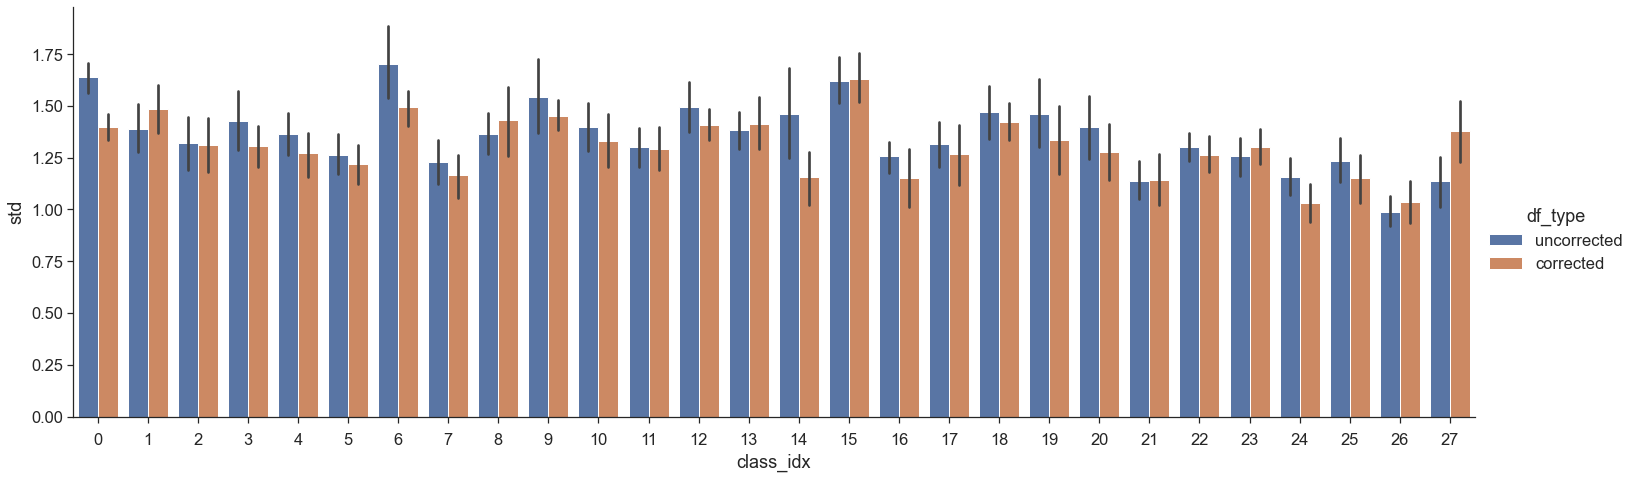

In [83]:
sns.set_theme(style='ticks', font_scale=1.5)
sns.catplot(data=df_noise, x='class_idx', hue='df_type', y='std', kind='bar', errorbar=('ci', 68), height=7, aspect=3)


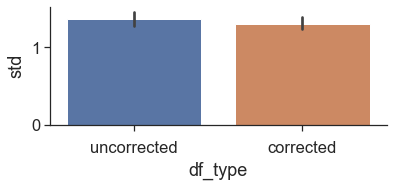

In [85]:
sns.set_theme(style='ticks', font_scale=1.5)
mean_df_noise = df_noise.query('class_idx < 28').groupby(['sub','df_type']).mean().reset_index()
sns.catplot(data=mean_df_noise, x='df_type', order=['uncorrected','corrected'], y='std', kind='bar', 
            hue_order=['uncorrected','corrected'], errorbar=('ci', 68), height=3, aspect=2)


In [88]:
ww = pd.read_csv('/Volumes/server/Projects/sfp_nsd/derivatives/dataframes/nsdsyn/binned/e1-0.5_e2-4_nbin-log3_sub-subj01_roi-V1_vs-pRFcenter.csv')



,sub,ecc_bin,freq_lvl,names,vroinames,betas,local_sf
0,subj01,0.5-1.0 deg,0,annulus,V1,1.600104,1.286699
4,subj01,0.5-1.0 deg,1,annulus,V1,2.230809,2.358948
8,subj01,0.5-1.0 deg,2,annulus,V1,1.923187,4.288996
12,subj01,0.5-1.0 deg,3,annulus,V1,2.190681,7.934643
16,subj01,0.5-1.0 deg,4,annulus,V1,2.778197,14.797037
20,subj01,0.5-1.0 deg,5,annulus,V1,1.674156,27.449576
